In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/')
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
from mcts import GridEnv

In [4]:
env = GridEnv()


In [5]:
env.grid

array([[1, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1]])

### Select a random tile 
Except start and goal.

In [6]:
env.grid.shape

(7, 7)

In [7]:
np.random.choice(env.grid.shape)

7

In [207]:
def select_tile():
    row = np.random.choice(env.grid.shape[0])
    col = np.random.choice(env.grid.shape[1])
    pos = (row,col)
    if all(map(lambda x: x is not None, pos)) and (pos != env.start) and (pos != env.goal):
        return pos
    else:
        select_tile()

In [179]:
sel = select_tile()

In [180]:
sel

(5, 3)

### Select next tile

In [97]:
def select_next_tile(sel):
    next_tiles = [(i,j) for i,j in env.moves + sel 
                     if np.subtract(env.grid.shape, (i,j)).all()
                     and env.grid[i,j] >= 0 ]
    return random.choice(next_tiles)

In [100]:
nt = select_next_tile(sel)
nt

(3, 5)

### Switch tiles

In [94]:
int(not bool(env.grid[nt]))

1

In [95]:
int(not bool(env.grid[sel]))

0

In [96]:
env.grid[sel]

1

In [115]:
def switch(selected_tile,next_tile):
    selected_value = bool(env.grid[selected_tile])
    next_value = bool(env.grid[next_tile])
    if selected_value != next_value:
        env.grid[selected_tile] = int(next_value)
        env.grid[next_tile] = int(selected_value)
        return True
    else:
        return False

### Test

In [280]:
env = GridEnv()

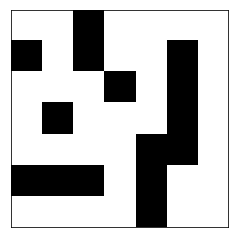

In [281]:
plt.imshow(env.grid, cmap='gray')
plt.yticks([])
plt.xticks([])
plt.show()

In [295]:
def move_tiles():
    sel = select_tile()
    if sel is not None:
        nt = select_next_tile(sel)
        if all(map(lambda x: x >= 0, nt)):
            s = switch(sel,nt)
            return s
move_tiles()

True

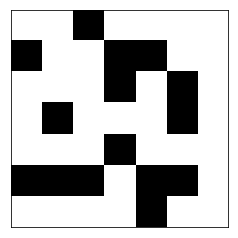

In [296]:
plt.imshow(env.grid, cmap='gray')
plt.yticks([])
plt.xticks([])
plt.show()

In [302]:
np.logspace(1,-1, 5)

array([10.        ,  3.16227766,  1.        ,  0.31622777,  0.1       ])